<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<h3>TITLE : Auto Regressive Integrated Moving Average </h3>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<h4>Exercise No. 1</h4> <div style="text-align:Right">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reg No : 23MDT0047 </div>
Date : April 23, 2024
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>AIM :</b> To determine the best forecasting model using ARIMA &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>Data Description :</b> Electric Production from 01/01/1985 to 01/01/2018..&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>
<div style="text-align:center">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It consists of two columns - Date and Value&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</div>


In [2]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 388.9 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 326.1 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 514.3 kB/s eta 0:00:01
   ------- ------------------------------ 122.9/614.7 kB 514.3 kB/s eta 0:00:01
   ------- -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm

In [2]:
data = pd.read_excel("ELECTRIC_PRODUCTION.xlsx", index_col=0)
data.head()

,Value
DATE,
1985-01-01,72.5052
1985-01-02,70.6720
1985-01-03,62.4502
1985-01-04,57.4714
1985-01-05,55.3151


In [3]:
data.index =pd.to_datetime(data.index)

In [4]:
data.columns = ['Energy Production']

<Axes: title={'center': 'Energy Production'}, xlabel='DATE'>

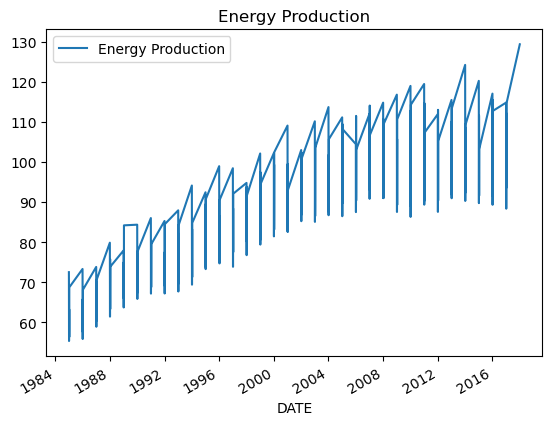

In [5]:
data.plot(title="Energy Production")

In [6]:
result = seasonal_decompose(data, model='multiplicative', period=12)

In [ ]:
result.plot()

From the graph we can see that data is indicating the presence of seasonal trend.

In [24]:
stepwise_model = pm.auto_arima(data, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=12,
                           start_P=0,start_Q=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1972.417, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1836.547, Time=0.29 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1835.973, Time=1.27 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1923.364, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1835.172, Time=0.96 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=1.39 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1823.212, Time=0.65 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=1852.611, Time=1.09 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.80 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.46 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=1.13 sec
 ARIMA(1,1,1)(1,1,1

Conclusion : ARIMA(1,1,1)(2,1,2) is suitable as it has the minimum AIC.

In [25]:
print(stepwise_model.aic())

1770.2279435200649


In [26]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 12)   Log Likelihood                -877.114
Date:                                 Tue, 23 Apr 2024   AIC                           1770.228
Time:                                         01:43:46   BIC                           1801.833
Sample:                                              0   HQIC                          1782.764
                                                 - 397                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0027      0.001     -3.053      0.002      -0.004      -0.001
ar.L1          0.5222      0.043     12.149      0.000       0.438       0.606
ma.L1         -0.9804      0.012    -82.604      0.000      -1.004      -0.957
ar.S.L12       0.3846      0.178      2.158      0.031       0.035       0.734
ar.S.L24      -0.3009      0.058     -5.192      0.000      -0.415      -0.187
ma.S.L12      -1.1188      0.180     -6.223      0.000      -1.471      -0.766
ma.S.L24       0.3841      0.145      2.644      0.008       0.099       0.669
sigma2         5.3766      0.320     16.782      0.000       4.749       6.005
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                21.59
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

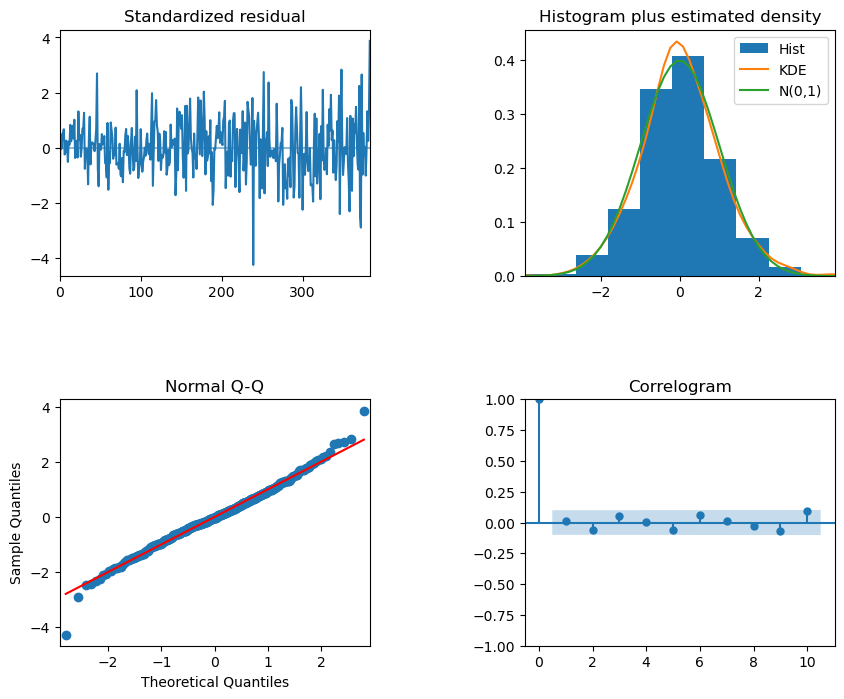

In [27]:
stepwise_model.plot_diagnostics(figsize=(10,8))
plt.subplots_adjust(wspace = 0.5,hspace=0.5)

Histogram plus estimated density plot shows that residuals do not follow normal distribution and are not linear.